### Data Cleaning

In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import MinMaxScaler

### Create Dataframe

In [2]:
# NOTE: this cell was only ran once, doesn't need to be run each time
# pollutants = ['CO/', 'NO2/', 'Ozone/', 'PM2.5/', 'PM10/', 'SO2/']

# # read in files and create dataframe of all data for each pollutant
# for pollutant in pollutants:
#     # empty list to store dfs
#     dfs = []
#     # iterate through files in the directory
#     for filename in os.listdir('data/' + pollutant):
#         df = pd.read_csv('data/' + pollutant + filename)

#         if pollutant == 'PM2.5/':
#             # only keep local conditions of pm2.5
#             df = df[df["AQS Parameter Description"] == "PM2.5 - Local Conditions"]
#         dfs.append(df)

#     # concatenate all dfs in the list
#     merged_df = pd.concat(dfs, ignore_index=True)
#     df = merged_df.drop(columns=["POC", "Source", "Local Site Name", "Percent Complete", "AQS Parameter Code", "AQS Parameter Description", "Method Code", "CBSA Code", "CBSA Name", "State FIPS Code", "State", "Units"])

#     # save the merged DataFrame to a new CSV file
#     df.to_csv('data/All/all_' + pollutant[:-1] + '.csv', index=False)

In [3]:
# NOTE: feel free to edit this cell to make the data cleaner, but otherwise it doesn't need to be run
# read in dataframes for each pollutant and merge into 1
# df_CO = pd.read_csv('data/All/all_CO.csv')
# df_NO2 = pd.read_csv('data/All/all_NO2.csv')
# df_Ozone = pd.read_csv('data/All/all_Ozone.csv')
# df_PM2_5 = pd.read_csv('data/All/all_PM2.5.csv')
# df_PM10 = pd.read_csv('data/All/all_PM10.csv')
# df_SO2 = pd.read_csv('data/All/all_SO2.csv')

# cols = ['Date', 'Site ID', 'County FIPS Code', 'County', 'Site Latitude', 'Site Longitude']

# mergedCO_NO2 = df_CO.merge(df_NO2, on=cols, how="outer", suffixes=(' CO', ' NO2'))
# mergedOzone_PM2 = df_Ozone.merge(df_PM2_5, on=cols, how="outer", suffixes=(' Ozone', ' PM2.5'))
# mergedPM10_SO2 = df_PM10.merge(df_SO2, on=cols, how="outer", suffixes=(' PM10', ' SO2'))
# mergedCO_NO2_Ozone_PM2 = mergedCO_NO2.merge(mergedOzone_PM2, on=cols, how="outer")
# all_merged = mergedCO_NO2_Ozone_PM2.merge(mergedPM10_SO2, on=cols, how='outer').drop(columns=["Method Description"])

# # reorder cols
# col_order = ["Date", "Site ID", "County", "County FIPS Code", "Site Latitude", "Site Longitude", 
#              "Daily Max 8-hour CO Concentration", "Daily AQI Value CO", "Daily Obs Count CO", 
#              "Daily Max 1-hour NO2 Concentration", "Daily AQI Value NO2", "Daily Obs Count NO2", 
#              "Daily Max 8-hour Ozone Concentration", "Daily AQI Value Ozone", "Daily Obs Count Ozone", 
#              "Daily Mean PM2.5 Concentration", "Daily AQI Value PM2.5", "Daily Obs Count PM2.5",
#              "Daily Mean PM10 Concentration", "Daily AQI Value PM10", "Daily Obs Count PM10",
#              "Daily Max 1-hour SO2 Concentration", "Daily AQI Value SO2", "Daily Obs Count SO2"]
# all_merged = all_merged[col_order]
# all_merged.to_csv('data/All/all_merged.csv')

NOTE: columns are measured in different units. CO: ppm, NO2: ppb, Ozone: ppm, PM2.5: ug/m3 LC, PM10: ug/m3 SC

In [4]:
# read in dataframe
df = pd.read_csv('data/All/all_merged.csv', usecols=lambda column: "Unnamed" not in column)

In [5]:
# Display first 5 rows of data
pd.set_option('display.max_columns', None)
df.head()

,Date,Site ID,County,County FIPS Code,Site Latitude,Site Longitude,Daily Max 8-hour CO Concentration,Daily AQI Value CO,Daily Obs Count CO,Daily Max 1-hour NO2 Concentration,Daily AQI Value NO2,Daily Obs Count NO2,Daily Max 8-hour Ozone Concentration,Daily AQI Value Ozone,Daily Obs Count Ozone,Daily Mean PM2.5 Concentration,Daily AQI Value PM2.5,Daily Obs Count PM2.5,Daily Mean PM10 Concentration,Daily AQI Value PM10,Daily Obs Count PM10,Daily Max 1-hour SO2 Concentration,Daily AQI Value SO2,Daily Obs Count SO2
0,01/01/2015,490030003,Box Elder,3,41.492707,-112.018863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,28.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,01/01/2015,490037001,Box Elder,3,41.945874,-112.233973,NaN,NaN,NaN,NaN,NaN,NaN,0.036,33.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/01/2015,490050004,Cache,5,41.731111,-111.837500,NaN,NaN,NaN,35.0,33.0,24.0,0.027,25.0,17.0,16.2,64.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,01/01/2015,490050004,Cache,5,41.731111,-111.837500,NaN,NaN,NaN,35.0,33.0,24.0,0.027,25.0,17.0,15.3,63.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,01/01/2015,490071003,Carbon,7,39.595750,-110.770111,NaN,NaN,NaN,NaN,NaN,NaN,0.045,42.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data Type Corrections

In [5]:
# Convert object columns to string
df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).astype('string')

# Convert date column to datetime object
df['Date'] = pd.to_datetime(df['Date'])

Remove duplicate data

In [6]:
# Find and remove duplicated data
duplicates = df.duplicated()
print("Removing",df[duplicates].shape[0], "duplicated data points")
df = df[-df.duplicated()]

Removing 9832 duplicated data points


Add Column for weekday/weekend

In [7]:
# Weekend column shows 1 for Saturday and Sunday, 0 for Mon, Tues, Wed, Thurs, Fri
df['Weekend'] = df['Date'].dt.weekday.map(lambda x: 1 if x >= 5 else 0)

Data Range Constraints
- Process: 
    - Look at the data range for each column. Research what the typical data range is for each column. Compare the ranges. 
    - We set negative concentration values to 0 since negative values are not possible. 


In [8]:
# Print range of data
def print_column_ranges(df):
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):  # Only process numeric columns
            col_min = df[col].min()
            col_max = df[col].max()
            print(f"{col}: Min = {col_min}, Max = {col_max}")

print_column_ranges(df)

Site ID: Min = 490030003, Max = 490571003
County FIPS Code: Min = 3, Max = 57
Site Latitude: Min = 37.179125, Max = 41.945874098
Site Longitude: Min = -113.305096, Max = -109.3047
Daily Max 8-hour CO Concentration: Min = -0.3, Max = 2.9
Daily AQI Value CO: Min = 0.0, Max = 33.0
Daily Obs Count CO: Min = 2.0, Max = 72.0
Daily Max 1-hour NO2 Concentration: Min = -3.0, Max = 135.0
Daily AQI Value NO2: Min = 0.0, Max = 107.0
Daily Obs Count NO2: Min = 18.0, Max = 24.0
Daily Max 8-hour Ozone Concentration: Min = 0.0, Max = 0.131
Daily AQI Value Ozone: Min = 0.0, Max = 227.0
Daily Obs Count Ozone: Min = 5.0, Max = 68.0
Daily Mean PM2.5 Concentration: Min = -2.3, Max = 138.8
Daily AQI Value PM2.5: Min = 0.0, Max = 214.0
Daily Obs Count PM2.5: Min = 1.0, Max = 2.0
Daily Mean PM10 Concentration: Min = -20.0, Max = 375.0
Daily AQI Value PM10: Min = 0.0, Max = 230.0
Daily Obs Count PM10: Min = 1.0, Max = 1.0
Daily Max 1-hour SO2 Concentration: Min = -1.7, Max = 24.0
Daily AQI Value SO2: Min = 0.0

In [9]:
concentration_columns = [
    'Daily Max 8-hour CO Concentration',
    'Daily Max 1-hour NO2 Concentration', 
    'Daily Max 8-hour Ozone Concentration',
    'Daily Mean PM2.5 Concentration', 
    'Daily Mean PM10 Concentration',
    'Daily Max 1-hour SO2 Concentration',
]

# Count negative and zero values per column
negative_counts = (df[concentration_columns] < 0).sum()
zero_counts = (df[concentration_columns] == 0).sum()

# Ser negative values to zero and count zero values per column
df[concentration_columns] = df[concentration_columns].clip(lower=0)
new_zero_counts = (df[concentration_columns] == 0).sum()

# Total observations per column
total_counts = df[concentration_columns].count()

# Calculate percentage of negative and zero values
negative_percentage = (negative_counts / total_counts) * 100
zero_percentage = (zero_counts / total_counts) * 100
new_zero_percentage = (new_zero_counts / total_counts) * 100

# Display results
summary = pd.DataFrame({
    "Negative Count": negative_counts,
    "Zero Count": zero_counts,
    "New Zero Count": new_zero_counts,
    "Total Count": total_counts,
    "Negative Percentage (%)": negative_percentage,
    "Zero Percentage (%)": zero_percentage,
    "New Zero Percentage (%)": new_zero_percentage
})

display(summary)
print_column_ranges(df)


,Negative Count,Zero Count,New Zero Count,Total Count,Negative Percentage (%),Zero Percentage (%),New Zero Percentage (%)
Daily Max 8-hour CO Concentration,669,5486,6155,53861,1.242086,10.185477,11.427564
Daily Max 1-hour NO2 Concentration,31,589,620,139859,0.022165,0.421138,0.443304
Daily Max 8-hour Ozone Concentration,0,40,40,165450,0.000000,0.024176,0.024176
Daily Mean PM2.5 Concentration,124,79,203,132989,0.093241,0.059403,0.152644
Daily Mean PM10 Concentration,2,113,115,69355,0.002884,0.162930,0.165814
Daily Max 1-hour SO2 Concentration,284,1343,1627,35027,0.810803,3.834185,4.644988


Site ID: Min = 490030003, Max = 490571003
County FIPS Code: Min = 3, Max = 57
Site Latitude: Min = 37.179125, Max = 41.945874098
Site Longitude: Min = -113.305096, Max = -109.3047
Daily Max 8-hour CO Concentration: Min = 0.0, Max = 2.9
Daily AQI Value CO: Min = 0.0, Max = 33.0
Daily Obs Count CO: Min = 2.0, Max = 72.0
Daily Max 1-hour NO2 Concentration: Min = 0.0, Max = 135.0
Daily AQI Value NO2: Min = 0.0, Max = 107.0
Daily Obs Count NO2: Min = 18.0, Max = 24.0
Daily Max 8-hour Ozone Concentration: Min = 0.0, Max = 0.131
Daily AQI Value Ozone: Min = 0.0, Max = 227.0
Daily Obs Count Ozone: Min = 5.0, Max = 68.0
Daily Mean PM2.5 Concentration: Min = 0.0, Max = 138.8
Daily AQI Value PM2.5: Min = 0.0, Max = 214.0
Daily Obs Count PM2.5: Min = 1.0, Max = 2.0
Daily Mean PM10 Concentration: Min = 0.0, Max = 375.0
Daily AQI Value PM10: Min = 0.0, Max = 230.0
Daily Obs Count PM10: Min = 1.0, Max = 1.0
Daily Max 1-hour SO2 Concentration: Min = 0.0, Max = 24.0
Daily AQI Value SO2: Min = 0.0, Max 

Determine and Examine Outliers
- Process:
    - Use IQR:
        - We increase the lower and upper bound coefficient from 1.5 to 3 in order to account for the wide variety of concentrations.

- Implications:
    - When excluding the outliers, we drop 5.18% of rows 
    - We create a boolean column describing if the observation is classified as an outlier. This will allow us to easily switch between including or excluding outliers.

In [10]:
# Select numeric pollution measurement columns
pollution_columns = [
    'Daily Max 8-hour CO Concentration',
    'Daily AQI Value CO', 
    'Daily Max 1-hour NO2 Concentration', 
    'Daily AQI Value NO2',
    'Daily Max 8-hour Ozone Concentration',
    'Daily AQI Value Ozone',
    'Daily Mean PM2.5 Concentration', 
    'Daily AQI Value PM2.5',
    'Daily Mean PM10 Concentration',
    'Daily AQI Value PM10',
    'Daily Max 1-hour SO2 Concentration',
    'Daily AQI Value SO2'
]

# Drop non-numeric or missing columns
pol_df = df[pollution_columns]

# Find outliers using IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    return (data < lower_bound) | (data > upper_bound)

outliers_iqr = pol_df.apply(detect_outliers_iqr)
df['Outlier'] = outliers_iqr.any(axis=1) # Create outlier column in the main df

Number of Rows of Outliers: 9509
Total Number of Rows 175009
Percentage of Outliers: 0.05433434851921901


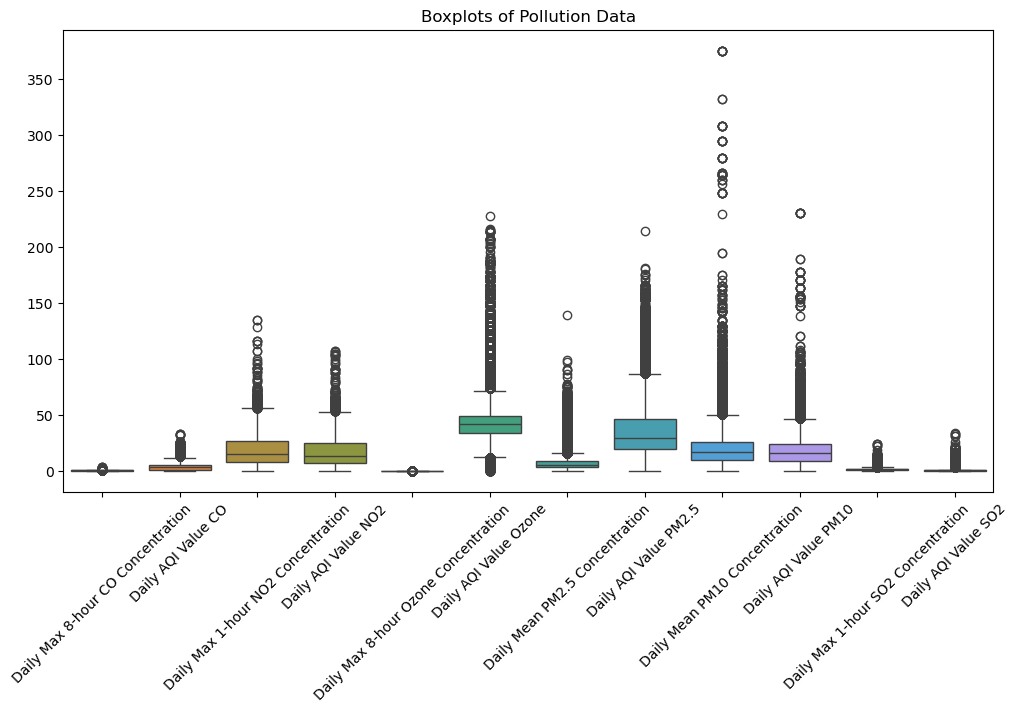

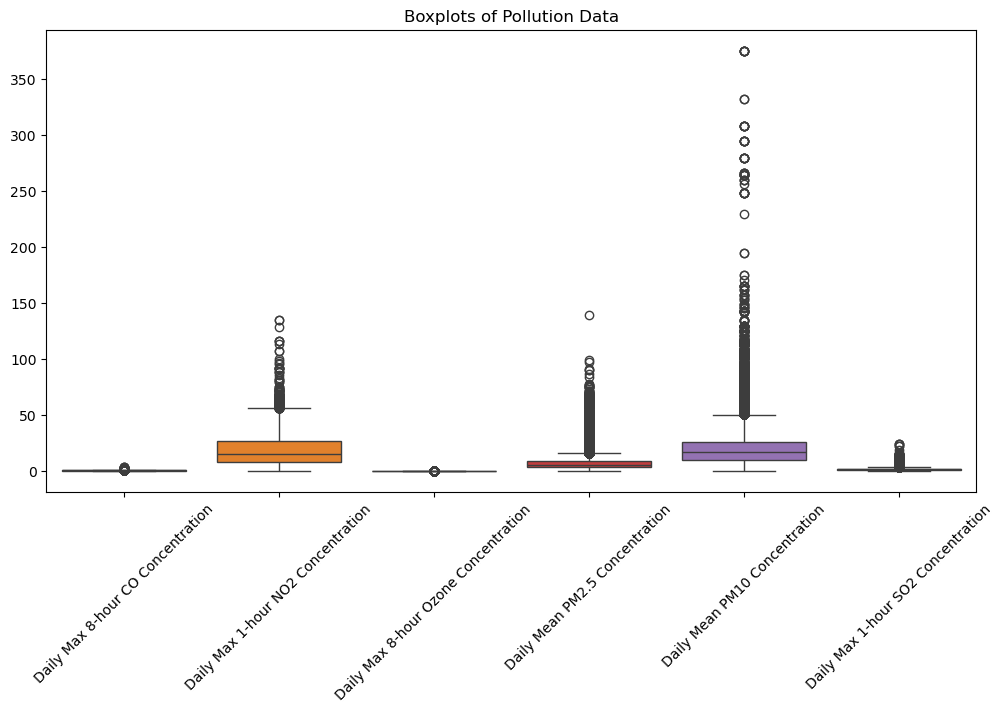

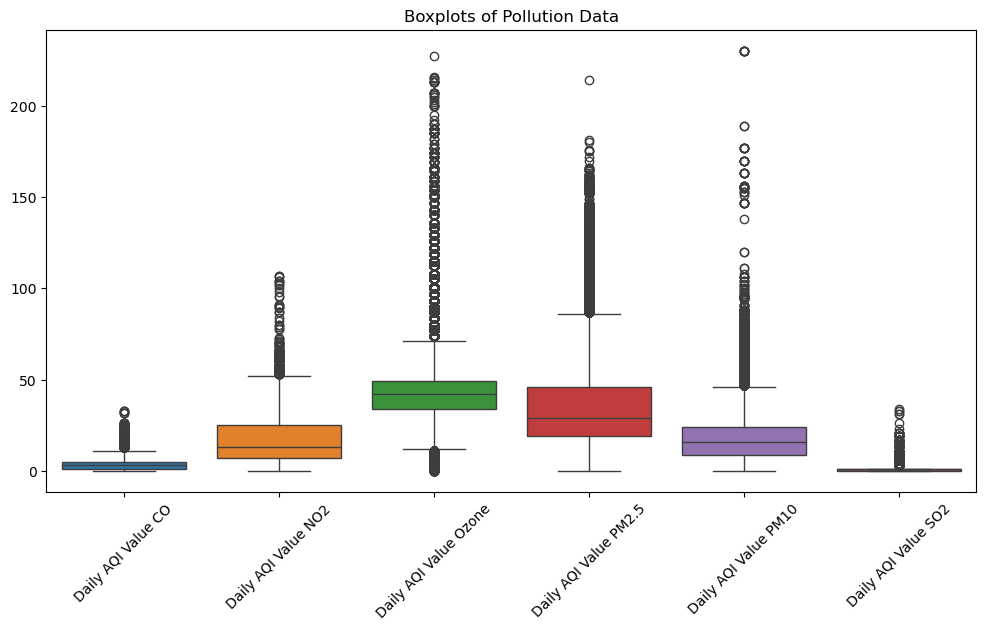

In [11]:
concentration_columns = [
    'Daily Max 8-hour CO Concentration',
    'Daily Max 1-hour NO2 Concentration', 
    'Daily Max 8-hour Ozone Concentration',
    'Daily Mean PM2.5 Concentration', 
    'Daily Mean PM10 Concentration',
    'Daily Max 1-hour SO2 Concentration',
]
concentration_df = df[concentration_columns]

aqi_columns = [
    'Daily AQI Value CO', 
    'Daily AQI Value NO2',
    'Daily AQI Value Ozone',
    'Daily AQI Value PM2.5',
    'Daily AQI Value PM10',
    'Daily AQI Value SO2'
]
aqi_df = df[aqi_columns]

# Display outliers
outliers_df = df[df['Outlier']]
print(f'Number of Rows of Outliers:', len(outliers_df))
print(f'Total Number of Rows', len(df))
print(f'Percentage of Outliers:', len(outliers_df) / len(df))

# Plot all boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=pol_df)
plt.xticks(rotation=45)
plt.title('Boxplots of Pollution Data')
plt.show()

# Plot concentration boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=concentration_df)
plt.xticks(rotation=45)
plt.title('Boxplots of Pollution Data')
plt.show()

# Plot AQI boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=aqi_df)
plt.xticks(rotation=45)
plt.title('Boxplots of Pollution Data')
plt.show()

In [12]:
# Look at data range after removing outliers
after_outliers_df = df[df['Outlier'] == False] # Keep only rows that are not in outliers_df
print_column_ranges(after_outliers_df)

Site ID: Min = 490030003, Max = 490571003
County FIPS Code: Min = 3, Max = 57
Site Latitude: Min = 37.179125, Max = 41.945874098
Site Longitude: Min = -113.305096, Max = -109.3047
Daily Max 8-hour CO Concentration: Min = 0.0, Max = 1.3
Daily AQI Value CO: Min = 0.0, Max = 15.0
Daily Obs Count CO: Min = 2.0, Max = 72.0
Daily Max 1-hour NO2 Concentration: Min = 0.0, Max = 80.7
Daily AQI Value NO2: Min = 0.0, Max = 79.0
Daily Obs Count NO2: Min = 18.0, Max = 24.0
Daily Max 8-hour Ozone Concentration: Min = 0.0, Max = 0.068
Daily AQI Value Ozone: Min = 0.0, Max = 93.0
Daily Obs Count Ozone: Min = 13.0, Max = 68.0
Daily Mean PM2.5 Concentration: Min = 0.0, Max = 22.7
Daily AQI Value PM2.5: Min = 0.0, Max = 76.0
Daily Obs Count PM2.5: Min = 1.0, Max = 2.0
Daily Mean PM10 Concentration: Min = 0.0, Max = 74.0
Daily AQI Value PM10: Min = 0.0, Max = 60.0
Daily Obs Count PM10: Min = 1.0, Max = 1.0
Daily Max 1-hour SO2 Concentration: Min = 0.0, Max = 3.9
Daily AQI Value SO2: Min = 0.0, Max = 4.0
D

Impute Missing Values

In [13]:
print("Row # Before Dropping Rows: ", df.shape[0])
# Drop rows with at least 10 missing values
df = df.dropna(thresh=df.shape[1] - 10 + 1)  # Keep rows with at least (total columns - 15 + 1) non-NaN value
print("Row # After Dropping Rows: ", df.shape[0])


# Select numeric columns for imputation
numeric_cols = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_cols]

print("Missing Values # Before Iterative Imputation:", df_numeric.isna().sum().sum())

# Initialize Iterative Imputer
imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=20, random_state=42)

# Apply iterative imputation
df_numeric_imputed = imputer.fit_transform(df_numeric)

# Assign imputed values back to DataFrame
df[numeric_cols] = df_numeric_imputed

print("Missing Values # After Iterative Imputation:", df.isna().sum().sum())

Row # Before Dropping Rows:  175009
Row # After Dropping Rows:  122347
Missing Values # Before Iterative Imputation: 648867
Missing Values # After Iterative Imputation: 0


Dimension Reduction 
- Process:
    - Use PCA:
        - Captures the most important variations in pollution levels
- Implications:
    - We will use df_pca as input for models

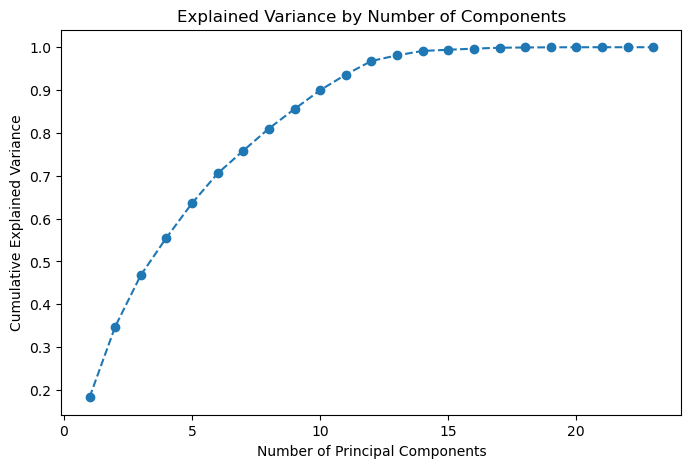

Optimal number of components: 12
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.085242 -3.244295 -1.236974 -0.186936 -0.505711 -1.955225 -0.012715   
1  2.018237 -3.221903 -1.292322 -0.175744 -0.494925 -1.944350 -0.026858   
2  2.164402 -2.085462 -1.505402 -0.137674 -1.308553 -2.259940  0.395850   
3  5.961718 -0.066326 -1.231913 -1.260100 -1.796597  1.204620  1.462777   
4  6.732129  1.231139 -2.217110 -1.080106 -0.141723  2.936569  3.050401   

        PC8       PC9      PC10      PC11      PC12  
0  0.089081 -0.172663 -0.889411  0.442998 -0.789459  
1  0.125004 -0.185862 -0.860383  0.384001 -0.732229  
2  0.065534 -0.415887 -0.504911  0.331996  0.262963  
3 -0.101776 -0.556349  0.212728 -0.789486  0.066188  
4 -0.777266 -0.943547  0.717530 -1.134231 -0.185448  


In [14]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number]).dropna()

# Standardize the data 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(df_scaled)

# Explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance to decide how many components to keep
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.show()

# Keep components that explain at least 95% of the variance
n_components = np.argmax(explained_variance >= 0.95) + 1
print(f'Optimal number of components: {n_components}')

# Transform data using selected components
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame with the optimal principal components
df_pca = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(n_components)])
print(df_pca.head())


In [17]:
# create filtered dataframe using only counties from the wasatch front
df = df[df['County'].isin(['Weber', 'Davis', 'Salt Lake', 'Utah'])]
df.head()

df['AQI'] = df[['Daily AQI Value CO', 'Daily AQI Value NO2', 'Daily AQI Value PM2.5', 'Daily AQI Value PM10', 'Daily AQI Value SO2', 'Daily AQI Value Ozone']].max(axis=1)

df.head()

,Date,Site ID,County,County FIPS Code,Site Latitude,Site Longitude,Daily Max 8-hour CO Concentration,Daily AQI Value CO,Daily Obs Count CO,Daily Max 1-hour NO2 Concentration,...,Daily Obs Count PM2.5,Daily Mean PM10 Concentration,Daily AQI Value PM10,Daily Obs Count PM10,Daily Max 1-hour SO2 Concentration,Daily AQI Value SO2,Daily Obs Count SO2,Weekend,Outlier,AQI
5,2015-01-01,490110004.0,Davis,11.0,40.902967,-111.884467,0.336017,3.656606,26.048769,45.0,...,1.0,18.642271,19.171825,1.0,2.593209,0.513284,24.545265,0.0,False,56.0
9,2015-01-01,490353006.0,Salt Lake,35.0,40.736389,-111.872222,1.000000,11.000000,18.000000,47.0,...,1.0,35.000000,32.000000,1.0,0.600000,0.000000,24.000000,0.0,False,67.0
18,2015-01-01,490490002.0,Utah,49.0,40.253611,-111.663056,1.300000,15.000000,19.000000,47.0,...,1.0,24.000000,22.000000,1.0,0.761783,1.851386,23.320275,0.0,False,63.0
19,2015-01-01,490490002.0,Utah,49.0,40.253611,-111.663056,1.300000,15.000000,19.000000,47.0,...,1.0,24.000000,22.000000,1.0,0.759746,1.841866,23.316768,0.0,False,58.0
26,2015-01-01,490570002.0,Weber,57.0,41.206321,-111.975524,0.900000,10.000000,19.000000,43.0,...,1.0,18.000000,17.000000,1.0,0.857403,3.081803,23.012938,0.0,False,59.0


Train/Validate/Test Split: 80/10/10 

In [18]:
train_df = df[df['Date'] < '01/01/2023']  # Train 80%
validate_df = df[(df['Date'] >= '01/01/2023') & (df['Date'] < '01/01/2024')]  # Validate 10%
test_df = df[df['Date'] >= '01/01/2024']  # Test 10%

Save to CSV

In [19]:
df.to_csv('AirQuality.csv', index=False)
train_df.to_csv('Train.csv', index=False)
validate_df.to_csv('Validate.csv', index=False)
test_df.to_csv('Test.csv', index=False)
df_pca.to_csv('PCA.csv', index=False)

## Data Cleaning Explanation

#### 1: Dataset Explanation

The dataset is an outdoor air quality dataset from the Environmental Protection Agency's Air Quality System, where data has to be officially submitted and certified. The data was originally collected at monitor stations across Utah, multiple times a day over a 10 year period. Depending on the pollutant measured, either the 8-hour max or daily average was recorded. The number of observations each day was also recorded and the Air Quality Index was calculated using equation 1 from page 13 of Technical Assistance Document for the Reporting of Daily Air Quality – the Air Quality Index (AQI) https://document.airnow.gov/technical-assistance-document-for-the-reporting-of-daily-air-quailty.pdf

After cleaning, the dataset has 23 features including date, location, and concentration, AQI and observation count for 5 pollutants. There are 147722 observations, with observations for multiple locations each day across 10 years. The data is publicly available and there are no privacy concerns with its use. Date, Site ID, County FIPS Code, and County are unitless. All six daily obs count columns are measured in number of observations. All six AQI columns are unitless as AQI is an index. The units for the concentration columns are as follows: CO: ppm, NO2: ppb, Ozone: ppm, PM2.5: ug/m3 LC, PM10: ug/m3 SC, SO2: ppb.

#### 2: Combining Datasets

Each pollutant had its own dataset for each year, meaning that 60 datasets were merged to create the current one. Merging pollutants across years was relatively simple because the data was standardized. Then the 6 dataframes were merged on Site ID, Date, County, Site Latitude and Site Longitude. The units columns were dropped because the concentrations were measured in different units. Any locations with less than three pollutants measured were also dropped. 

#### 3: Problems with the Data

Several features required data type conversions. The 'Date' feature was converted to a datetime object, while all columns of object type were converted to strings for consistency. To deal with missing values, we dropped any rows that had 10 or more missing values since they left too many gaps in the data. After that, the highest percentage of missing values in any column was around 10%. We attempted to use K-Nearest Neighbors (KNN), but it was too computationally expensive. We then chose to use sklearn's IterativeImputer method since it is still able to handle complex relationships and uses other features to fill in values. We also ran into a lot of duplicate rows and are still figuring out whether we accidentally created them when importing the data or if they were already in the original dataset. As for outliers, some values stood out as extreme, but none seemed obviously wrong. Since real-world data naturally has outliers, we decided to keep them. We will set up our code so we can easily include or remove later.

#### 4: Suitable Data for Research Questions

What are the key factors correlated with air quality; how do wildfires and pollution levels influence air quality indices?
- Our data focuses on a variety of pollutants, along with the air quality index. This should help us determine key factors in air quality

How do seasonal patterns, long-term industrial changes, and the implementation of environmental policies affect air quality trends over time?
- We have 10 years worth of data, so finding seasonal patterns is possible, but long term industrial changes and environmental policies over time might be hard to track with our dataset. Adding more data would probably represent the long term questions better.

To what extent can we accurately forecast air quality 3 days in advance using historical data using markov chains and other mathematical techniques?
- We can use the answers of the previous two questions to answer this one, which means our data is suitable for this project.


#### 5: Data Collection

Air quality patterns change over time with environmental policies, industrial shifts, and climate changes. An example of this is increasing wildfires. To combat this, we can use time-series weighting that gives higher importance to recent samples. 

#### 6: Train/Validate/Test Split Methods

We will split the data into three sections: training on the earliest 80% of the data (8 years), validation on the next 10% (1 year), and testing on the most recent 10% (1 year). This way our model only learns from past data to predict future values. To avoid leakage, we will not use future information when training models and will make sure that any feature engineering (such as rolling averages) is based only on past observations. We will fix a random seed when partitioning the validation set to make sure it is reproducible.
- Note: We are currently looking at 10 years of data. This number can increase if needed based on our results. 


#### 7: Dataset Readiness

Our dataset is 90% ready to be used in our models.

There are negative pollutant concentration values that require further investigation. 